## Loading Packages

In [1]:
import warnings

import xarray as xr
import getpass

%matplotlib inline
warnings.simplefilter("ignore")

In [ ]:
%load_ext autoreload
%autoreload 2

## Instantiate connection

In [9]:
'''store, in python variables, values of USERNAME and PASSWORD 
(or request them from free) as well as the DATASET_ID.'''

USERNAME = 'username'
PASSWORD = getpass.getpass('Enter your password: ')

Enter your password: ········


In [ ]:
DATASET_ID = 'cmems_mod_glo_wav_anfc_0.083deg_PT3H-i'

In [3]:
'''instantiate the connection to the OPeNDAP server thanks to a local 
function copernicusmarine_datastore(): '''

#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2021 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    return data_store


In [4]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [5]:
dataset = xr.open_dataset(data_store)
dataset.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 -179.8 -179.7
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 -79.75 -79.67
  * time       (time) datetime64[ns] 2019-01-01T03:00:00 ... 2019-01-01T15:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VMDR_WW    (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VMDR_SW2   (time, latitude, longitude) float32 ...
    ...         ...
    VTPK       (time, latitude, longitude) float32 ...
    VSDX       (time, latitude, longitude) float32 ...
    VSDY       (time, latitude, longitude) float32 ...
    VPED       (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
Attributes: (12/27)
    Conventions:                   CF-1.6
    time_coverage_start:           20220130-03:00:00
    time_coverage_end:             20220131-00:00:00
    date_created:                  20220121-07:35:00
    product_type:                  forecast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                            ...
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

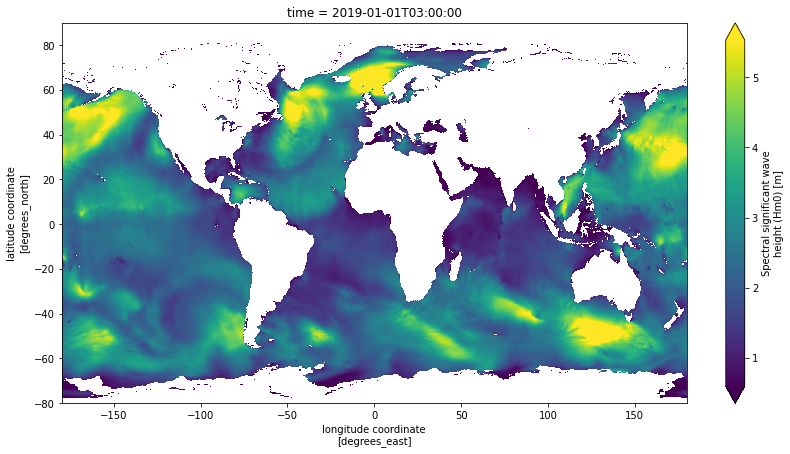

In [6]:
# Plot one variable in the dataset for a specific time slice
dataset.VHM0.isel(time=0).plot(robust=True, aspect=2, size=7);

In [7]:
time_slice = "2021-01-20T00:00:00"
lon_min = -80
lat_min = 32
lon_max = -5
lat_max = 47
var = 'VHM0'

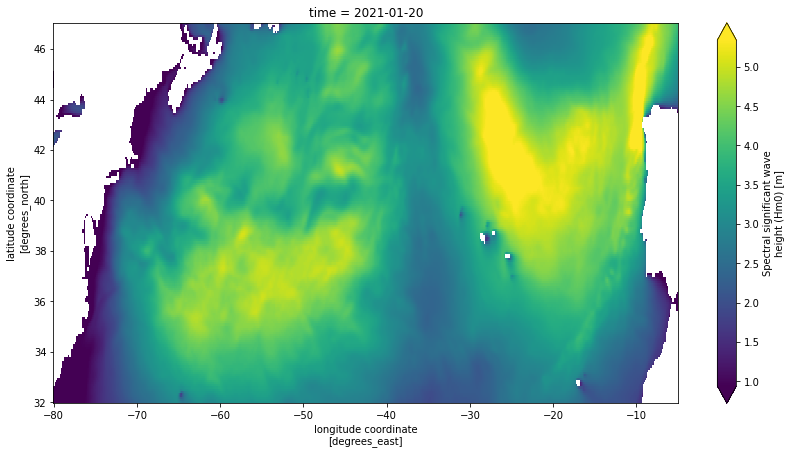

In [8]:
# subset space, time and variable

# by value
wave_height = dataset[var].sel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
# by index
#wave_height = dataset[var].isel(time=6000, longitude=slice(1200, 2100), latitude=slice(1350, 1520))

# plot
wave_height.plot(robust=True, aspect=2, size=7);